In [1]:
import pandas as pd
import pickle
pd.set_option("display.max_columns", None)
from collections import Counter
import spacy

In [2]:
# to communicate with google spreadsheet...
import gspread
from gspread_dataframe import get_as_dataframe
from gspread_dataframe import set_with_dataframe
from google.oauth2 import service_account # based on google-auth library
import sddk

s = sddk.cloudSession("sciencedata.dk")
# establish connection with gogglesheets...
file_data = s.read_file("https://sciencedata.dk/files/ServiceAccountsKey.json", "dict") # or load it from a local storage: json.load(open("../../ServiceAccountsKey.json", "r"))
credentials = service_account.Credentials.from_service_account_info(file_data)
gc = gspread.Client(auth=credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']))
mops_data = gc.open_by_url("https://docs.google.com/spreadsheets/d/1VbCIAJssHKV9hlRTwzVFfm40CGnHesq53KXjv2qy4OM/edit?usp=sharing")

endpoint variable has been configured to: https://sciencedata.dk/files/


In [12]:
jstor_df = pd.read_feather("../data/large_files/jstor_df_v1.feather")

In [3]:
unigramCount_dict = pickle.load(open("../data/large_files/unigramCount_cleaned_dict.pickle", "rb"))

In [10]:
list(unigramCount_dict.items())[0][1]

Counter({'': 4305,
         'stock': 1,
         'question': 16,
         'trifle': 1,
         'resentful': 1,
         'run': 3,
         'carriage': 1,
         'watch': 1,
         'unheard': 1,
         'Cross': 4,
         'see': 18,
         'diverse': 1,
         'substitute': 1,
         'heaven': 5,
         'come': 15,
         'speak': 4,
         'cost': 2,
         'flicker': 1,
         'meddle': 1,
         'silent': 1,
         'risk': 1,
         'Craftsman Master': 1,
         'Jones': 1,
         'beingthe': 1,
         'Robert': 3,
         'array': 1,
         'joy': 1,
         'grateful': 1,
         'office': 4,
         'power': 9,
         'foundation': 2,
         'strain': 1,
         'take': 11,
         'disposition': 1,
         'folk': 2,
         'various': 1,
         'succumb': 1,
         'L': 1,
         'Phd': 1,
         'demonstrate': 1,
         '61a': 1,
         'midst': 2,
         'chariot': 1,
         'hatred': 1,
         'service': 7,
 

In [13]:
# manual test
col = "publicationYear"
matchstring = "==1951"
eval('jstor_df[jstor_df["{0}"]{1}]'.format(col, matchstring))["id"].tolist()

['http://www.jstor.org/stable/1198957',
 'http://www.jstor.org/stable/1508417',
 'ark://27927/phx7f9rxk2',
 'http://www.jstor.org/stable/3261590',
 'http://www.jstor.org/stable/24456097',
 'ark://27927/pgg389199fd',
 'ark://27927/phx61xr9tmg',
 'ark://27927/pgh1g2mt8q5',
 'ark://27927/phx61xrbpxv',
 'ark://27927/phx64dprn08',
 'http://www.jstor.org/stable/43720276',
 'http://www.jstor.org/stable/20516383',
 'http://www.jstor.org/stable/41175585',
 'ark://27927/phx61tbjnvh',
 'http://www.jstor.org/stable/1198933',
 'http://www.jstor.org/stable/1456587',
 'http://www.jstor.org/stable/43720275',
 'http://www.jstor.org/stable/44210186',
 'ark://27927/phx622zp8bt',
 'http://www.jstor.org/stable/1197811',
 'ark://27927/pgh1h1tfc4p',
 'http://www.jstor.org/stable/42621087',
 'ark://27927/phx61tbjqw3',
 'ark://27927/phx64dprn74',
 'ark://27927/pgh1h00bn1j',
 'ark://27927/pgh1g2mt8xg',
 'ark://27927/phx6bfsx4f4',
 'http://www.jstor.org/stable/1198956',
 'http://www.jstor.org/stable/3262039',
 '

In [56]:
def ids_from_colvals(df_name, col, matchstring):
    ids = eval('{0}[{0}["{1}"]{2}]'.format(df_name, col, matchstring))["id"].tolist()
    return ids

In [77]:
# test with function...
len(ids_from_colvals("jstor_df", "publicationYear", ".between(1920, 1929)"))

132

In [16]:
def merge_data_from_ids(ids, datadict):
    c = Counter()
    for id in ids:
        d = datadict[id]
        c.update(d)
    return c

In [21]:
def get_tops(df, col, matchstring, n=10):
    ids = ids_from_colvals(df, col, matchstring)
    c = merge_data_from_ids(ids, unigramCount_dict)
    c_tups = [el for el in c.items() if el[0] != ""]
    top10 = sorted(c_tups, key=lambda kv: kv[1], reverse=True)[:n]
    return top10

In [22]:
for decade_n in range(0,10):
    decade = "19{0}0,19{0}9".format(str(decade_n))
    print(decade, get_tops("publicationYear", ".between({0})".format(decade), 20))

1900,1909 [('have', 10474), ('Proc', 3199), ('Jesus', 3027), ('God', 2975), ('do', 2933), ('man', 2803), ('Paul', 2745), ('Christ', 2688), ('be', 2497), ('see', 2465), ('other', 2461), ('d', 2420), ('new', 2370), ('church', 2370), ('life', 2191), ('make', 2023), ('say', 2002), ('book', 2002), ('christian', 1963), ('time', 1935)]
1910,1919 [('have', 11567), ('do', 3701), ('man', 3186), ('God', 3154), ('Jesus', 2862), ('be', 2767), ('church', 2728), ('make', 2418), ('say', 2286), ('other', 2241), ('Paul', 2162), ('time', 2059), ('life', 2010), ('christian', 1982), ('new', 1974), ('great', 1887), ('come', 1877), ('see', 1759), ('give', 1751), ('Christ', 1670)]
1920,1929 [('have', 8269), ('p', 2613), ('new', 2245), ('be', 2089), ('do', 1999), ('man', 1713), ('church', 1678), ('make', 1602), ('other', 1563), ('work', 1544), ('Paul', 1500), ('give', 1336), ('God', 1332), ('year', 1328), ('christian', 1324), ('time', 1312), ('say', 1270), ('religion', 1212), ('book', 1176), ('great', 1145)]
1

In [23]:
jstor_df.head(5)

,creator,datePublished,docType,doi,id,identifier,isPartOf,issueNumber,keyphrase,language,outputFormat,pageCount,pageEnd,pageStart,pagination,provider,publicationYear,publisher,sequence,tdmCategory,title,url,volumeNumber,wordCount,docSubType,sourceCategory,subTitle,hasPartTitle
0,[],1959-10-01,article,10.1177/001452465907100107,ark://27927/phx66812gq6,"[{'name': 'doi', 'value': '10.1177/00145246590...",Expository Times,1,"[omnipotent reigneth, god omnipotent, silence,...",[eng],"[unigram, bigram, trigram]",8.0,31,24,pp. 24-31,portico,1959,SAGE Publications,7.0,"[Religion - Theology, Religion - Spiritual bel...",In the Study,http://doi.org/10.1177/001452465907100107,71,7382,None,None,None,None
1,[Victor Paul Furnish],2009-01-01,chapter,10.1017/CBO9780511621321.003,ark://27927/pbd6fpf5fh,"[{'name': 'isbn', 'value': '9780511621321'}, {...",Jesus According to PaulJesus According to Paul,None,"[saying, books online, jesus tradition, pauls ...",[eng],"[unigram, bigram, trigram]",26.0,65,40,40-65,portico,2009,Cambridge University Press,5.0,"[History - Historical methodology, Religion - ...",3 Sayings of Jesus in Paul's Letters,https://doi.org/10.1017/CBO9780511621321.003,None,8577,None,None,None,None
2,[Leander E. Keck],2015-01-01,chapter,None,ark://27927/phw1kd8s300,[],Christ&#39;s First Theologian,None,"[pharisaism, sandmel genius, judaism, rabbinic...",[eng],"[unigram, bigram, trigram]",14.0,42,29,29-42,portico,2015,Baylor University Press,8.0,"[History - Historical methodology, Religion - ...",3. The Quest for Pauls Pharisaism,None,None,5354,None,None,None,None
3,[LeAnn Snow Flesher],2009-02-01,article,10.1177/003463730910600105,ark://27927/phx64fptrwj,"[{'name': 'doi', 'value': '10.1177/00346373091...",Review & Expositor: An International Baptist J...,1,"[scofield, premillennial, premillennial dispen...",[eng],"[unigram, bigram, trigram]",11.0,45,35,pp. 35-45,portico,2009,SAGE Publications,5.0,"[Religion - Theology, Religion - Spiritual bel...",The Historical Development of Premillennial Di...,http://doi.org/10.1177/003463730910600105,106,3614,None,None,None,None
4,[A. Daunton-Fear],1995-07-01,article,10.1177/0040571X9509800404,ark://27927/phx64k1x5c2,"[{'name': 'doi', 'value': '10.1177/0040571X950...",Theology,784,"[baptism, holy spirit, communion, infant bapti...",[eng],"[unigram, bigram, trigram]",10.0,282,273,273-282,portico,1995,SAGE Publications,4.0,[Religion - Spiritual belief systems],Resisting the Tide Christian Initiation and Co...,http://doi.org/10.1177/0040571X9509800404,98,4323,None,None,None,None


In [65]:
def pct_frequency(df_name, col, matchstring, wordlist):
    ids = ids_from_colvals(df_name, col, matchstring)
    jstor_df_subset = eval('{0}[{0}["id"].isin(ids)]'.format(df_name))
    totalwords = jstor_df_subset["wordCount"].sum()
    c = merge_data_from_ids(ids, unigramCount_dict)
    wordlist_data = {}
    for word in wordlist:
        word_pct_frequency = (c[word] / totalwords) * 100
        wordlist_data[word] = word_pct_frequency
    return wordlist_data

In [67]:
data = []
for decade_n in range(0,10):
    decade = "19{0}0,19{0}9".format(str(decade_n))
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("jstor_df", "publicationYear", ".between({0})".format(decade), ["God", "Paul", "Jesus", "Christ"]))
    data.append(decade_data)

In [68]:
pd.DataFrame(data)

,decade,God,Paul,Jesus,Christ
0,"1900,1909",0.204684,0.188859,0.208261,0.184938
1,"1910,1919",0.263048,0.180314,0.238695,0.139280
2,"1920,1929",0.139414,0.156997,0.093256,0.091896
3,"1930,1939",0.253791,0.104859,0.123861,0.135302
4,"1940,1949",0.369197,0.237859,0.175342,0.229071
5,"1950,1959",0.360366,0.252268,0.167151,0.234572
6,"1960,1969",0.368954,0.249019,0.162933,0.241616
7,"1970,1979",0.338972,0.267827,0.150324,0.208015
8,"1980,1989",0.368815,0.331902,0.172326,0.205690
9,"1990,1999",0.302153,0.314132,0.154758,0.158038


[Text(0, 0, '1900,1909'),
 Text(1, 0, '1910,1919'),
 Text(2, 0, '1920,1929'),
 Text(3, 0, '1930,1939'),
 Text(4, 0, '1940,1949'),
 Text(5, 0, '1950,1959'),
 Text(6, 0, '1960,1969'),
 Text(7, 0, '1970,1979'),
 Text(8, 0, '1980,1989'),
 Text(9, 0, '1990,1999')]

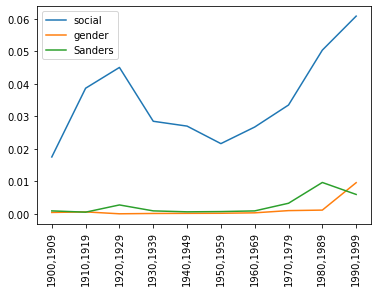

In [50]:
words = ["social", "gender", "Sanders"]
data = []
for decade_n in range(0,10):
    decade = "19{0}0,19{0}9".format(str(decade_n))
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("publicationYear", ".between({0})".format(decade), words))
    data.append(decade_data)
data_df = pd.DataFrame(data)
data_df


In [ ]:
ax = data_df.plot()
ax.set_xticks(range(len(data_df)))
ax.set_xticklabels(data_df["decade"].tolist(), rotation=90)

[Text(0, 0, '1900,1909'),
 Text(1, 0, '1910,1919'),
 Text(2, 0, '1920,1929'),
 Text(3, 0, '1930,1939'),
 Text(4, 0, '1940,1949'),
 Text(5, 0, '1950,1959'),
 Text(6, 0, '1960,1969'),
 Text(7, 0, '1970,1979'),
 Text(8, 0, '1980,1989'),
 Text(9, 0, '1990,1999')]

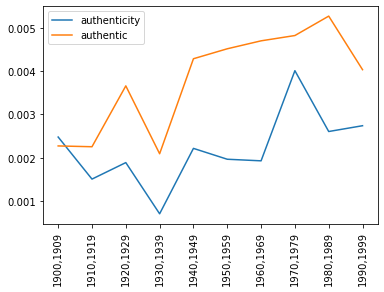

In [52]:
words = ["authenticity", "authentic"]
data = []
for decade_n in range(0,10):
    decade = "19{0}0,19{0}9".format(str(decade_n))
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("publicationYear", ".between({0})".format(decade), words))
    data.append(decade_data)
data_df = pd.DataFrame(data)
data_df

ax = data_df.plot()
ax.set_xticks(range(len(data_df)))
ax.set_xticklabels(data_df["decade"].tolist(), rotation=90)

In [70]:
jstor_articles = jstor_df[jstor_df["docType"]=="article"]
len(jstor_articles)

9560

[Text(0, 0, '1900,1909'),
 Text(1, 0, '1910,1919'),
 Text(2, 0, '1920,1929'),
 Text(3, 0, '1930,1939'),
 Text(4, 0, '1940,1949'),
 Text(5, 0, '1950,1959'),
 Text(6, 0, '1960,1969'),
 Text(7, 0, '1970,1979'),
 Text(8, 0, '1980,1989'),
 Text(9, 0, '1990,1999')]

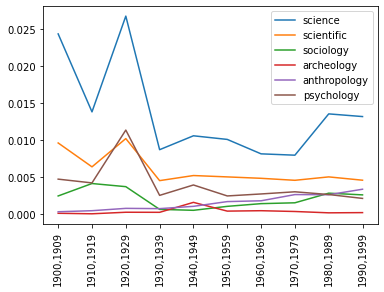

In [90]:
words = ["science", "scientific", "sociology", "anthropology", "psychology"]
data = []
for decade_n in range(0,10):
    decade = "19{0}0,19{0}9".format(str(decade_n))
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("jstor_articles", "publicationYear", ".between({0})".format(decade), words))
    data.append(decade_data)
data_df = pd.DataFrame(data)
data_df

ax = data_df.plot()
ax.set_xticks(range(len(data_df)))
ax.set_xticklabels(data_df["decade"].tolist(), rotation=90)

[Text(0, 0, '1900,1909'),
 Text(1, 0, '1910,1919'),
 Text(2, 0, '1920,1929'),
 Text(3, 0, '1930,1939'),
 Text(4, 0, '1940,1949'),
 Text(5, 0, '1950,1959'),
 Text(6, 0, '1960,1969'),
 Text(7, 0, '1970,1979'),
 Text(8, 0, '1980,1989'),
 Text(9, 0, '1990,1999')]

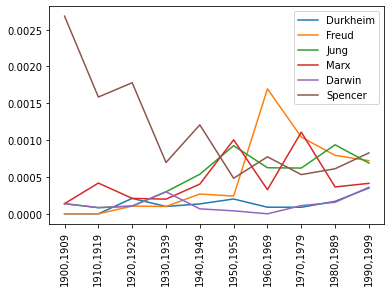

In [88]:
words = ["Durkheim", "Freud", "Jung", "Marx", "Darwin", "Spencer"]
data = []
for decade_n in range(0,10):
    decade = "19{0}0,19{0}9".format(str(decade_n))
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("jstor_articles", "publicationYear", ".between({0})".format(decade), words))
    data.append(decade_data)
data_df = pd.DataFrame(data)
data_df

ax = data_df.plot()
ax.set_xticks(range(len(data_df)))
ax.set_xticklabels(data_df["decade"].tolist(), rotation=90)

# Exploring interest in science in the 20s

In [79]:
# test with function...
ids = ids_from_colvals("jstor_df", "publicationYear", ".between(1920, 1929)")

In [80]:
jstor_df[jstor_df["id"].isin(ids)]

,creator,datePublished,docType,doi,id,identifier,isPartOf,issueNumber,keyphrase,language,outputFormat,pageCount,pageEnd,pageStart,pagination,provider,publicationYear,publisher,sequence,tdmCategory,title,url,volumeNumber,wordCount,docSubType,sourceCategory,subTitle,hasPartTitle
72,[Anna Benedbtti],1928-10-01,article,10.1111/j.1467-954X.1928.tb01672.x,ark://27927/phx2hv5phb6,"[{'name': 'doi', 'value': '10.1111/j.1467-954X...",Sociological Review,4,"[sicily, palermo, sicilian, island, bentinck, ...",[eng],"[unigram, bigram, trigram]",10.0,309,300,300-309,portico,1928,"John Wiley & Sons, Inc.",4.0,"[Arts - Art history, Religion - Theology]",ABOUT SICILY,http://doi.org/10.1111/j.1467-954X.1928.tb01672.x,a20,4618,None,None,None,None
152,[E. F. Scott],1922-01-01,article,None,http://www.jstor.org/stable/1195100,"[{'name': 'issn', 'value': '00224189'}, {'name...",The Journal of Religion,1,None,[eng],"[unigram, bigram, trigram, fullText]",3.0,101,99,pp. 99-101,jstor,1922,University of Chicago Press,NaN,[Religion - Spiritual belief systems],The Influence of the Apostle Paul on Early Chr...,http://www.jstor.org/stable/1195100,2,1002,book-review,"[Religion, Humanities]",None,None
199,None,1921-07-01,article,None,http://www.jstor.org/stable/528469,"[{'name': 'issn', 'value': '10620516'}, {'name...",The American Journal of Semitic Languages and ...,4,None,[eng],"[unigram, bigram, trigram, fullText]",5.0,241,241,p. 241,jstor,1921,University of Chicago Press,NaN,[Religion - Theology],Front Matter,http://www.jstor.org/stable/528469,37,1571,misc,"[Archaeology, Middle East Studies, Social Scie...",None,None
312,[John V. Madison],1925-01-01,article,None,http://www.jstor.org/stable/3260255,"[{'name': 'issn', 'value': '00219231'}, {'name...",Journal of Biblical Literature,3/4,None,[eng],"[unigram, bigram, trigram, fullText]",28.0,288,261,pp. 261-288,jstor,1925,Society of Biblical Literature,NaN,"[Religion - Theology, Arts - Literature]",English Versions of the New Testament: A Bibli...,http://www.jstor.org/stable/3260255,44,7876,research-article,"[Religion, Humanities]",None,None
521,None,1929-10-01,article,None,http://www.jstor.org/stable/25080246,"[{'name': 'issn', 'value': '00764981'}, {'name...",Proceedings of the Massachusetts Historical So...,None,None,[eng],"[unigram, bigram, trigram]",42.0,230,191,pp. 191-230,jstor,1929,Massachusetts Historical Society,NaN,[Religion - Spiritual belief systems],May Meeting. Gifts to the Society; George Phil...,http://www.jstor.org/stable/25080246,63,16117,research-article,"[American Studies, Area Studies, History, Hist...",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13566,[Paul Revere Frothingham],1921-10-01,article,None,http://www.jstor.org/stable/25080131,"[{'name': 'issn', 'value': '00764981'}, {'name...",Proceedings of the Massachusetts Historical So...,None,None,[eng],"[unigram, bigram, trigram, fullText]",34.0,318,285,pp. 285-318,jstor,1921,Massachusetts Historical Society,NaN,[Religion - Spiritual belief systems],"Annual Meeting, April, 1922. Gifts to the Soci...",http://www.jstor.org/stable/25080131,55,10980,research-article,"[American Studies, Area Studies, History, Hist...",None,None
13589,None,1921-01-01,article,None,http://www.jstor.org/stable/1195400,"[{'name': 'issn', 'value': '00224189'}, {'name...",The Journal of Religion,1,None,[eng],"[unigram, bigram, trigram, fullText]",6.0,112,107,pp. 107-112,jstor,1921,University of Chicago Press,NaN,[Religion - Theology],Books Received,http://www.jstor.org/stable/1195400,1,2112,misc,"[Religion, Humanities]",None,None
13854,[ASHER J. JACOBY],1920-02-26,article,None,http://www.jstor.org/stable/42805504,"[{'name': 'issn', 'value': '00220574'}, {'name...",The Journal of Education,9 (2269),None,[eng],"[unigram, bigram, trigram, fullText]",3.0,229,227,pp. 227-229,jstor,1920,Trustees of Boston University,NaN,"[Religion - Theology, Religion - Spiritual bel...",PUBLIC SCHOOL EXTENSI

In [ ]:
jstor_df[jstor_df["id"].isin(ids)][]


[Text(0, 0, '1900,1909'),
 Text(1, 0, '1910,1919'),
 Text(2, 0, '1920,1929'),
 Text(3, 0, '1930,1939'),
 Text(4, 0, '1940,1949'),
 Text(5, 0, '1950,1959'),
 Text(6, 0, '1960,1969'),
 Text(7, 0, '1970,1979'),
 Text(8, 0, '1980,1989'),
 Text(9, 0, '1990,1999')]

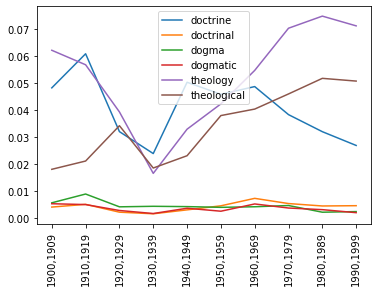

In [92]:
words = ["doctrine", "doctrinal", "dogma", "dogmatic", "theology", "theological"]
data = []
for decade_n in range(0,10):
    decade = "19{0}0,19{0}9".format(str(decade_n))
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("jstor_articles", "publicationYear", ".between({0})".format(decade), words))
    data.append(decade_data)
data_df = pd.DataFrame(data)
data_df

ax = data_df.plot()
ax.set_xticks(range(len(data_df)))
ax.set_xticklabels(data_df["decade"].tolist(), rotation=90)

In [96]:
# test with function...
ids = ids_from_colvals("jstor_df", "publicationYear", ".between(1930, 1939)")
jstor_1930 = jstor_df[jstor_df["id"].isin(ids)]
jstor_1930.head(20)


,creator,datePublished,docType,doi,id,identifier,isPartOf,issueNumber,keyphrase,language,outputFormat,pageCount,pageEnd,pageStart,pagination,provider,publicationYear,publisher,sequence,tdmCategory,title,url,volumeNumber,wordCount,docSubType,sourceCategory,subTitle,hasPartTitle
316,[James Moffatt],1936-01-01,article,10.1017/S0017816000033186,ark://27927/pgh1gbbbsx6,"[{'name': 'local_publisher_id', 'value': 'S001...",Harvard Theological Review,1,"[ignatius, presbyters, christ, philad, christi...",[eng],"[unigram, bigram, trigram]",38.0,38,1,1-38,portico,1936,Cambridge University Press,3.0,"[History - Historical methodology, Religion - ...",An Approach to Ignatius,http://doi.org/10.1017/S0017816000033186,29,17552,research-article,None,None,None
335,[J. E. Frame],1930-01-01,article,None,http://www.jstor.org/stable/3259867,"[{'name': 'issn', 'value': '00219231'}, {'name...",Journal of Biblical Literature,1,None,[eng],"[unigram, bigram, trigram]",12.0,12,1,pp. 1-12,jstor,1930,Society of Biblical Literature,NaN,"[Religion - Theology, Religion - Spiritual bel...",Paul's Idea of Deliverance,http://www.jstor.org/stable/3259867,49,4851,research-article,"[Religion, Humanities]",None,None
362,[Maurice Goguel],1930-04-01,article,None,http://www.jstor.org/stable/1507638,"[{'name': 'issn', 'value': '00178160'}, {'name...",The Harvard Theological Review,2,None,[eng],"[unigram, bigram, trigram]",28.0,120,93,pp. 93-120,jstor,1930,Cambridge University Press,NaN,"[History - Historical methodology, Religion - ...",The Problem of Jesus,http://www.jstor.org/stable/1507638,23,11406,research-article,"[Religion, Humanities]",None,None
440,"[John Glenn Blackburn, Professor Gaines S. Dob...",1938-07-01,article,10.1177/003463733803500306,ark://27927/phx64dm3qgz,"[{'name': 'doi', 'value': '10.1177/00346373380...",Review & Expositor: An International Baptist J...,3,"[church, modern church, living christ, souther...",[eng],"[unigram, bigram, trigram]",7.0,334,328,pp. 328-334,portico,1938,SAGE Publications,6.0,"[Religion - Spiritual belief systems, Philosop...",Men and the Modern Church,http://doi.org/10.1177/003463733803500306,35,2161,None,None,None,None
592,[Stephen Khoobyar],1937-10-01,article,10.1111/j.1478-1913.1937.tb00369.x,ark://27927/phx2gjmvsxv,"[{'name': 'doi', 'value': '10.1111/j.1478-1913...",The Muslim World,4,"[moslems, christ, preaching, message, christia...",[eng],"[unigram, bigram, trigram]",11.0,380,370,370-380,portico,1937,"John Wiley & Sons, Inc.",6.0,[Religion - Spiritual belief systems],THE JOY OF PREACHING TO MOSLEMS,http://doi.org/10.1111/j.1478-1913.1937.tb00369.x,27,4133,None,None,None,None
856,[John W. Moran],1935-01-01,article,10.5840/thought193510240,ark://27927/pgg388w11zg,"[{'name': 'doi', 'value': '10.5840/thought1935...",Thought: Fordham University Quarterly,2,None,[eng],"[unigram, bigram, trigram]",12.0,265,254,254-265,portico,1935,Philosophy Documentation Center,5.0,[Religion - Spiritual belief systems],The Eucharistie Sacrifice in Ancient Corinth,http://doi.org/10.5840/thought193510240,10,4471,article,None,None,None
865,[A. G. Russell],1937-05-01,article,10.1017/S0017383500004861,ark://27927/pgj2z1b5q3,"[{'name': 'local_publisher_id', 'value': 'S001...",Greece & Rome,18,"[christians, roman empire, worship, emperor, j...",[eng],"[unigram, bigram, trigram]",9.0,178,170,170-178,portico,1937,Cambridge University Press,7.0,"[Religion - Theology, Religion - Spiritual bel...","The Jews, The Roman Empire, and Christianity, ...",http://doi.org/10.1017/S0017383500004861,6,4161,research-article,None,None,None
955,None,1931-10-01,article,None,http://www.jstor.org/stable/1195926,"[{'name': 'issn', 'value': '00224189'}, {'name...",The Journal of Religion,4,None,[eng],"[unigram, bigram, trigram]",6.0,None,None,None,jstor,1931,University of Chicago Press,NaN,[Religion - Spiritual belief systems],Front Matter,http://www.jstor.org/stable/1195926,11,1572,misc,"[Religion, Humanities]",None,None
974,"[C. A. Harper, Isaac Baker, J. W. Fell, Davi

In [97]:
jstor_df[jstor_df["isPartOf"]=="The Muslim World"]["title"]

52                               THE BIBLE IN MOSLEM HANDS
63                              THE STUDY OF MUSLIM ETHICS
108                            THE SIGNIFICANCE OF ABRAHAM
184                                THE QUR'ĀN AS SCRIPTURE
415      Discourse, Identity, and Community: Problems a...
581                           THE REASONABLENESS OF CHRIST
592                        THE JOY OF PREACHING TO MOSLEMS
639                        Islam‐Its Worth and Its Failure
735                                  THEOCRACY: “GOD‐RULE”
883             Trinity vs. Monotheism: A False Dichotomy?
1138                        SIN AND GRACE IN MOHAMMEDANISM
1355                   A VISIT TO THE GRAVE OF AL GHAZZALI
1366                              THE HEART OF OUR MESSAGE
1836                                  MOSLEM RETROGRESSION
1983                                         CURRENT TOPIC
2205                                 THE GOSPEL FOR MALAYS
2507                        MUSLIM‐CHRISTIAN RELATIONSHI